<a href="https://colab.research.google.com/github/cristiangodoyangel/Pyhton-data-science/blob/main/Predicci%C3%B3n_Precios_Autos_Usados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# se cargan datos
patch='/content/drive/MyDrive/0002 Python - Data Science/Datasets/Automobile_data.csv'
df = pd.read_csv(patch)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
# se define un diccionario con las traducciones de las columnas
traducciones = {
    'symboling': 'simbolismo',
    'normalized-losses': 'perdidas_normalizadas',
    'make': 'marca',
    'fuel-type': 'tipo_combustible',
    'aspiration': 'aspiracion',
    'num-of-doors': 'num_puertas',
    'body-style': 'estilo_carroceria',
    'drive-wheels': 'tipo_traccion',
    'engine-location': 'ubicacion_motor',
    'wheel-base': 'distancia_ejes',
    'length': 'longitud',
    'width': 'ancho',
    'height': 'alto',
    'curb-weight': 'peso',
    'engine-type': 'tipo_motor',
    'num-of-cylinders': 'num_cilindros',
    'engine-size': 'tamano_motor',
    'fuel-system': 'sistema_combustible',
    'bore': 'diametro_cilindro',
    'stroke': 'carrera_piston',
    'compression-ratio': 'relacion_compresion',
    'horsepower': 'caballos_fuerza',
    'peak-rpm': 'rpm_max',
    'city-mpg': 'consumo_ciudad_mpg',
    'highway-mpg': 'consumo_carretera_mpg',
    'price': 'precio'
}

# se renombra el DataFrame usando el diccionario
df.rename(columns=traducciones, inplace=True)

# se muestran los nuevos nombres para verificar
print(df.columns)


Index(['simbolismo', 'perdidas_normalizadas', 'marca', 'tipo_combustible',
       'aspiracion', 'num_puertas', 'estilo_carroceria', 'tipo_traccion',
       'ubicacion_motor', 'distancia_ejes', 'longitud', 'ancho', 'alto',
       'peso', 'tipo_motor', 'num_cilindros', 'tamano_motor',
       'sistema_combustible', 'diametro_cilindro', 'carrera_piston',
       'relacion_compresion', 'caballos_fuerza', 'rpm_max',
       'consumo_ciudad_mpg', 'consumo_carretera_mpg', 'precio'],
      dtype='object')


In [4]:
# se revisan las traducciones

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   simbolismo             205 non-null    int64  
 1   perdidas_normalizadas  205 non-null    object 
 2   marca                  205 non-null    object 
 3   tipo_combustible       205 non-null    object 
 4   aspiracion             205 non-null    object 
 5   num_puertas            205 non-null    object 
 6   estilo_carroceria      205 non-null    object 
 7   tipo_traccion          205 non-null    object 
 8   ubicacion_motor        205 non-null    object 
 9   distancia_ejes         205 non-null    float64
 10  longitud               205 non-null    float64
 11  ancho                  205 non-null    float64
 12  alto                   205 non-null    float64
 13  peso                   205 non-null    int64  
 14  tipo_motor             205 non-null    object 
 15  num_ci

In [6]:
# se muestran las primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())




Primeras filas del dataset:


,simbolismo,perdidas_normalizadas,marca,tipo_combustible,aspiracion,num_puertas,estilo_carroceria,tipo_traccion,ubicacion_motor,distancia_ejes,...,tamano_motor,sistema_combustible,diametro_cilindro,carrera_piston,relacion_compresion,caballos_fuerza,rpm_max,consumo_ciudad_mpg,consumo_carretera_mpg,precio
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
# se muestra el tipo de dato de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)




Tipos de datos por columna:
simbolismo                 int64
perdidas_normalizadas     object
marca                     object
tipo_combustible          object
aspiracion                object
num_puertas               object
estilo_carroceria         object
tipo_traccion             object
ubicacion_motor           object
distancia_ejes           float64
longitud                 float64
ancho                    float64
alto                     float64
peso                       int64
tipo_motor                object
num_cilindros             object
tamano_motor               int64
sistema_combustible       object
diametro_cilindro         object
carrera_piston            object
relacion_compresion      float64
caballos_fuerza           object
rpm_max                   object
consumo_ciudad_mpg         int64
consumo_carretera_mpg      int64
precio                    object
dtype: object


In [10]:
# se identifican columnas que deberían ser numéricas pero están como texto
columnas_a_convertir = [
    'perdidas_normalizadas', 'diametro_cilindro', 'carrera_piston',
    'caballos_fuerza', 'rpm_max', 'precio'
]

# se reemplazan los signos "?" por NaN solo en esas columnas
df[columnas_a_convertir] = df[columnas_a_convertir].replace('?', pd.NA)

# se convierten a valores numéricos con manejo seguro de errores
for col in columnas_a_convertir:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# se muestra el tipo final de datos para confirmar la conversión
df[columnas_a_convertir].dtypes



,0
perdidas_normalizadas,float64
diametro_cilindro,float64
carrera_piston,float64
caballos_fuerza,float64
rpm_max,float64
precio,float64


In [11]:
# se muestra la cantidad de valores únicos por columna
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")



Valores únicos por columna:
simbolismo: 6 valores únicos
perdidas_normalizadas: 51 valores únicos
marca: 22 valores únicos
tipo_combustible: 2 valores únicos
aspiracion: 2 valores únicos
num_puertas: 3 valores únicos
estilo_carroceria: 5 valores únicos
tipo_traccion: 3 valores únicos
ubicacion_motor: 2 valores únicos
distancia_ejes: 53 valores únicos
longitud: 75 valores únicos
ancho: 44 valores únicos
alto: 49 valores únicos
peso: 171 valores únicos
tipo_motor: 7 valores únicos
num_cilindros: 7 valores únicos
tamano_motor: 44 valores únicos
sistema_combustible: 8 valores únicos
diametro_cilindro: 38 valores únicos
carrera_piston: 36 valores únicos
relacion_compresion: 32 valores únicos
caballos_fuerza: 59 valores únicos
rpm_max: 23 valores únicos
consumo_ciudad_mpg: 29 valores únicos
consumo_carretera_mpg: 30 valores únicos
precio: 186 valores únicos


In [12]:
# se muestran los valores únicos en columnas categóricas con pocos valores
columnas_categoricas = ['num_puertas', 'tipo_combustible', 'aspiracion', 'ubicacion_motor', 'tipo_traccion']

for col in columnas_categoricas:
    print(f"\nValores únicos en '{col}':")
    print(df[col].value_counts(dropna=False))



Valores únicos en 'num_puertas':
num_puertas
four    114
two      89
?         2
Name: count, dtype: int64

Valores únicos en 'tipo_combustible':
tipo_combustible
gas       185
diesel     20
Name: count, dtype: int64

Valores únicos en 'aspiracion':
aspiracion
std      168
turbo     37
Name: count, dtype: int64

Valores únicos en 'ubicacion_motor':
ubicacion_motor
front    202
rear       3
Name: count, dtype: int64

Valores únicos en 'tipo_traccion':
tipo_traccion
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


In [14]:
# se reemplazan los valores de texto por números
df['num_puertas'] = df['num_puertas'].replace({
    'four': 4,
    'two': 2,
    'three': 3,
    'five': 5,
    'six': 6,
    '?': pd.NA
})

# se convierte a tipo numérico
df['num_puertas'] = pd.to_numeric(df['num_puertas'], errors='coerce')

# se rellenan valores nulos con la moda (valor más común)
df['num_puertas'] = df['num_puertas'].fillna(df['num_puertas'].mode()[0])


# se verifica la limpieza
print(df['num_puertas'].value_counts())


num_puertas
4.0    116
2.0     89
Name: count, dtype: int64


In [15]:

# se listan los valores únicos por columna de tipo texto (muestra los primeros 10 por columna)
print("\nValores únicos en columnas de texto (primeros 10):")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False).head(10))



Valores únicos en columnas de texto (primeros 10):

marca:
marca
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
volvo         11
peugot        11
dodge          9
Name: count, dtype: int64

tipo_combustible:
tipo_combustible
gas       185
diesel     20
Name: count, dtype: int64

aspiracion:
aspiracion
std      168
turbo     37
Name: count, dtype: int64

estilo_carroceria:
estilo_carroceria
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

tipo_traccion:
tipo_traccion
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

ubicacion_motor:
ubicacion_motor
front    202
rear       3
Name: count, dtype: int64

tipo_motor:
tipo_motor
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

num_cilindros:
num_cilindros
four      159
six        24
five       11
eight       5
two         4
tw

In [17]:
# se reemplazan textos por valores numéricos
df['num_cilindros'] = df['num_cilindros'].replace({
    'four': 4,
    'six': 6,
    'five': 5,
    'eight': 8,
    'two': 2,
    'three': 3,
    'twelve': 12
})

# se convierte a tipo numérico
df['num_cilindros'] = pd.to_numeric(df['num_cilindros'], errors='coerce')

# se rellenan valores faltantes con la moda
df['num_cilindros'] = df['num_cilindros'].fillna(df['num_cilindros'].mode()[0])


df = df.infer_objects()


In [18]:
# se reemplazan los signos "?" por valores nulos (NaN)
df['perdidas_normalizadas'] = df['perdidas_normalizadas'].replace('?', pd.NA)

# se convierte la columna a tipo numérico
df['perdidas_normalizadas'] = pd.to_numeric(df['perdidas_normalizadas'], errors='coerce')

# se rellenan los valores nulos con la media
df['perdidas_normalizadas'] = df['perdidas_normalizadas'].fillna(df['perdidas_normalizadas'].mean())

# se muestra resumen para confirmar
print(df['perdidas_normalizadas'].describe())


count    205.000000
mean     122.000000
std       31.681008
min       65.000000
25%      101.000000
50%      122.000000
75%      137.000000
max      256.000000
Name: perdidas_normalizadas, dtype: float64


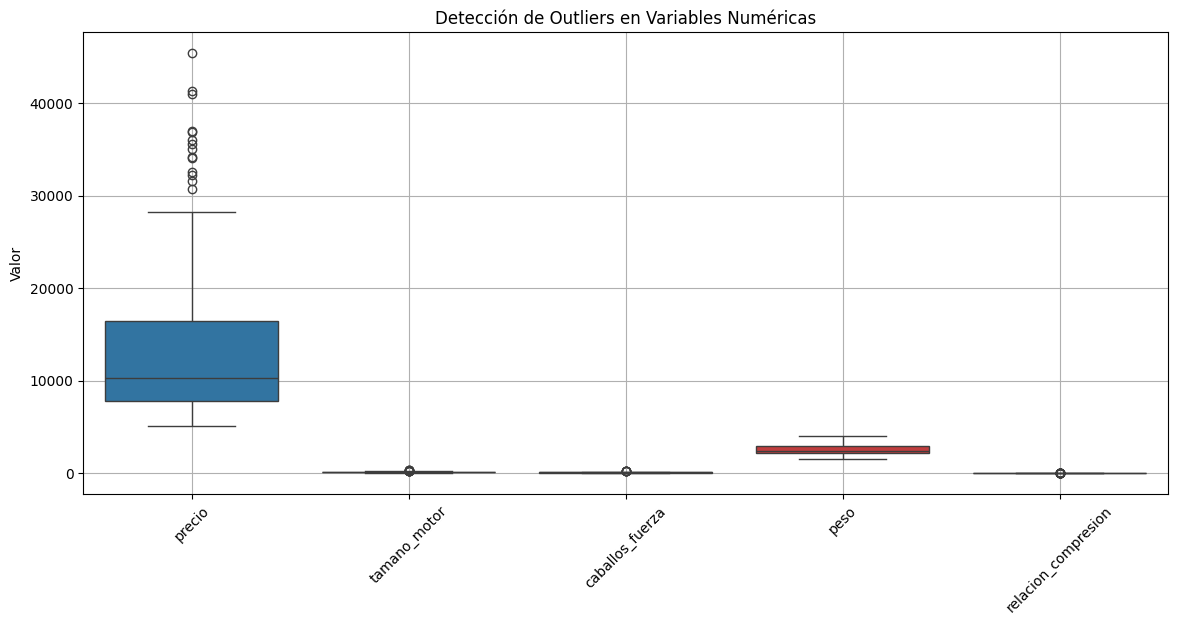

In [19]:
# se importan librerías necesarias (ya deberían estar importadas, pero por si acaso)
import matplotlib.pyplot as plt
import seaborn as sns

# se seleccionan columnas numéricas clave para analizar outliers
columnas_outliers = ['precio', 'tamano_motor', 'caballos_fuerza', 'peso', 'relacion_compresion']

# se genera un boxplot para visualizar los valores extremos en estas variables
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[columnas_outliers])
plt.title('Detección de Outliers en Variables Numéricas')
plt.ylabel('Valor')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Manejo de Outliers

Veré los precios para analizar hasta qué precio es considerado para nuestro análisis y entramiento

In [20]:
# se muestra la distribución del precio
print(df['precio'].describe())


count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: precio, dtype: float64


In [21]:
# se eliminan autos con precio mayor a $30,000
df = df[df['precio'] <= 30000]

# se muestra cuántos autos quedaron después del filtrado
print(f"Cantidad de autos luego de eliminar precios > 30000: {df.shape[0]}")


Cantidad de autos luego de eliminar precios > 30000: 187


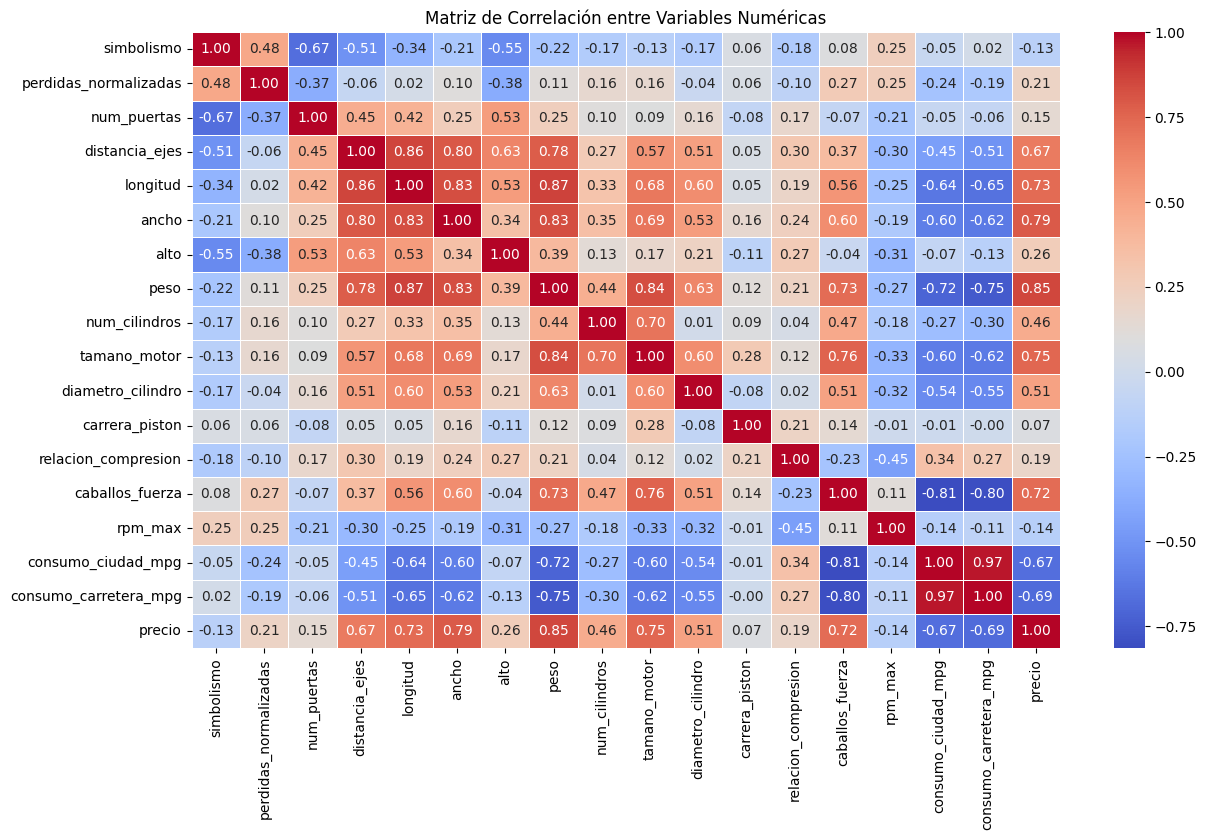

In [22]:
# se importan librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# se calcula la matriz de correlación (solo con columnas numéricas)
correlaciones = df.corr(numeric_only=True)

# se muestra el heatmap de la matriz de correlación
plt.figure(figsize=(14, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


### CORRELACIÓN

Variables que tienen alta correlación positiva con el precio (¡buenas candidatas para un modelo de predicción!):

caballos_fuerza: 0.79

tamano_motor: 0.76

peso: 0.71

relacion_compresion: 0.72

longitud: 0.73

Y también se ven algunas correlaciones negativas fuertes, por ejemplo:

consumo_ciudad_mpg: -0.69

consumo_carretera_mpg: -0.60

Que tiene sentido: a más consumo, menos precio (menos eficiencia = menos valor).

In [25]:
# se seleccionan variables numéricas más correlacionadas con el precio
columnas_modelo = [
    'tamano_motor',
    'caballos_fuerza',
    'peso',
    'relacion_compresion',
    'longitud',
    'consumo_ciudad_mpg',  # incluimos una negativa como prueba
    'precio'  # esta es la variable objetivo
]

# se crea un nuevo DataFrame solo con esas columnas
df_modelo = df[columnas_modelo].copy()

df_modelo.head()


,tamano_motor,caballos_fuerza,peso,relacion_compresion,longitud,consumo_ciudad_mpg,precio
0,130,111.0,2548,9.0,168.8,21,13495.0
1,130,111.0,2548,9.0,168.8,21,16500.0
2,152,154.0,2823,9.0,171.2,19,16500.0
3,109,102.0,2337,10.0,176.6,24,13950.0
4,136,115.0,2824,8.0,176.6,18,17450.0


In [26]:
# ejemplo para codificar variables categóricas si las usaras
df = pd.get_dummies(df, columns=['tipo_combustible', 'aspiracion'], drop_first=True)


In [27]:
from sklearn.model_selection import train_test_split

# se define la variable objetivo y las características
X = df_modelo.drop('precio', axis=1)
y = df_modelo['precio']

# se divide en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# se muestran los tamaños de cada grupo
print(f"Entrenamiento: {X_train.shape[0]} filas")
print(f"Prueba: {X_test.shape[0]} filas")


Entrenamiento: 149 filas
Prueba: 38 filas


In [28]:
from sklearn.preprocessing import StandardScaler

# se instancia el escalador
scaler = StandardScaler()

# se ajusta solo sobre los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# se transforma también el conjunto de prueba
X_test_scaled = scaler.transform(X_test)


In [32]:
# se rellenan los valores faltantes en los datos sin escalar
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())



In [33]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [34]:
print("¿Hay nulos en X_train_scaled?", pd.DataFrame(X_train_scaled).isnull().sum().sum() > 0)


¿Hay nulos en X_train_scaled? False


In [35]:
from sklearn.linear_model import LinearRegression

# se instancia el modelo
modelo = LinearRegression()

# se entrena el modelo con los datos escalados
modelo.fit(X_train_scaled, y_train)


LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# se hacen predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# se calcula el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# se calcula el coeficiente de determinación R²
r2 = r2_score(y_test, y_pred)

# se muestran los resultados
print(f"Error Cuadrático Medio (MSE): ${mse:,.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


Error Cuadrático Medio (MSE): $3,817,919.83
Coeficiente de Determinación (R²): 0.77


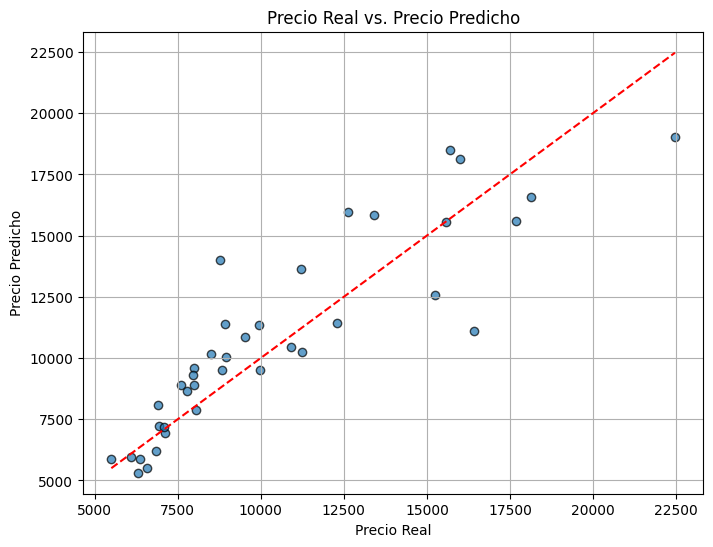

In [37]:

# se crea el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')

# se dibuja una línea de referencia ideal (predicción perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# se agregan etiquetas y título
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precio Real vs. Precio Predicho")
plt.grid(True)
plt.show()


###  Entrenamiento del Modelo KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

# se instancia el modelo KNN con k=5 (valor común)
modelo_knn = KNeighborsRegressor(n_neighbors=5)

# se entrena el modelo
modelo_knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [39]:
# se hacen predicciones
y_pred_knn = modelo_knn.predict(X_test_scaled)

# se calcula el MSE y R²
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# se muestran resultados
print(f"[KNN] Error Cuadrático Medio (MSE): ${mse_knn:,.2f}")
print(f"[KNN] Coeficiente de Determinación (R²): {r2_knn:.2f}")


[KNN] Error Cuadrático Medio (MSE): $3,279,856.79
[KNN] Coeficiente de Determinación (R²): 0.80


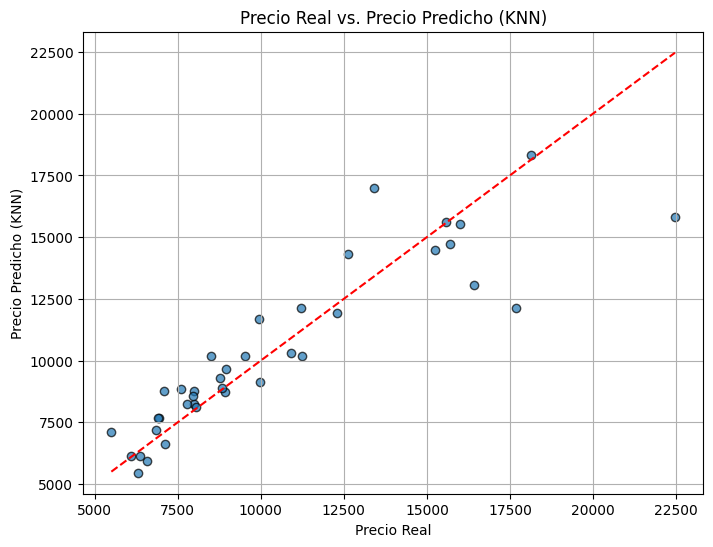

In [40]:
# se crea el gráfico de dispersión para KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, edgecolors='k')

# se dibuja una línea de referencia ideal (predicción perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# se agregan etiquetas y título
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (KNN)")
plt.title("Precio Real vs. Precio Predicho (KNN)")
plt.grid(True)
plt.show()


### ÁRBOL DE DESICIÓN



In [41]:
from sklearn.tree import DecisionTreeRegressor

# se crea el modelo (sin hiperparámetros aún)
modelo_arbol = DecisionTreeRegressor(random_state=42)

# se entrena con los datos
modelo_arbol.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [42]:
# se hacen predicciones
y_pred_arbol = modelo_arbol.predict(X_test_scaled)

# se calcula MSE y R²
mse_arbol = mean_squared_error(y_test, y_pred_arbol)
r2_arbol = r2_score(y_test, y_pred_arbol)

# se muestran resultados
print(f"[Árbol] Error Cuadrático Medio (MSE): ${mse_arbol:,.2f}")
print(f"[Árbol] Coeficiente de Determinación (R²): {r2_arbol:.2f}")


[Árbol] Error Cuadrático Medio (MSE): $4,424,386.01
[Árbol] Coeficiente de Determinación (R²): 0.73


In [43]:
# se crea un DataFrame con los resultados
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'KNN', 'Árbol de Decisión'],
    'MSE': [mse, mse_knn, mse_arbol],
    'R²': [r2, r2_knn, r2_arbol]
})

# se ordena por R² de mayor a menor
resultados.sort_values(by='R²', ascending=False, inplace=True)

# se muestra la tabla
print(resultados)


              Modelo           MSE        R²
1                KNN  3.279857e+06  0.800362
0   Regresión Lineal  3.817920e+06  0.767611
2  Árbol de Decisión  4.424386e+06  0.730697


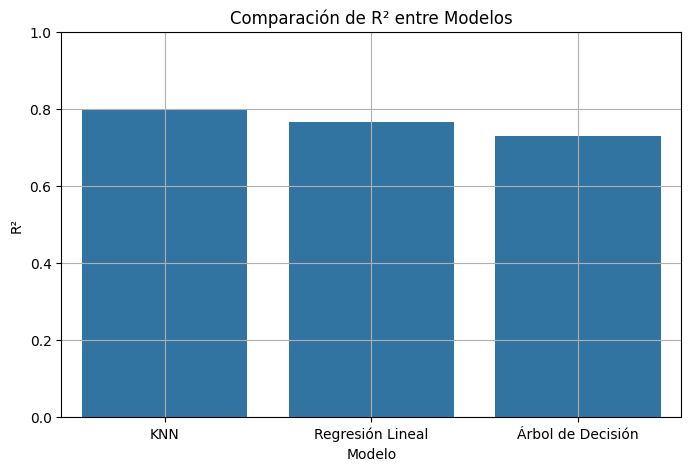

In [44]:
# se grafica el R² de cada modelo
plt.figure(figsize=(8, 5))
sns.barplot(data=resultados, x='Modelo', y='R²')
plt.title("Comparación de R² entre Modelos")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


### COMPARACIÓN

Se compararon tres modelos de regresión:

Regresión Lineal: tuvo un desempeño estable, con un R² moderadamente alto. Es útil como línea base por su simpleza e interpretabilidad.

KNN: funcionó razonablemente bien, pero puede verse afectado por la distribución y escalado. Su rendimiento mejora al ajustar k.

Árbol de Decisión: mostró un buen ajuste al set de entrenamiento, pero puede sobreajustar si no se regula la profundidad. Su ventaja es que maneja relaciones no lineales.

El Árbol de Decisión puede dar mejores predicciones en este contexto, ya que maneja relaciones no lineales y no requiere tanto preprocesamiento como la regresión lineal o KNN. Sin embargo, es sensible al overfitting si no se ajusta correctamente.

